In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import mlxtend as ml
from scipy import sparse
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

import warnings
warnings.filterwarnings("ignore")

## 1 - Dataset


Input Dataset

In [ ]:
data = pd.read_excel('/content/Ekspor Indonesia 2023.xlsx')

In [ ]:
data.head(5)

,ID,Country,Port,Month,Product,HS Code,Value (USD)
0,1,AFGHANISTAN,BELAWAN,1,Vegetable plaiting materials,14,11750.00
1,1,AFGHANISTAN,BELAWAN,1,Miscellaneous manufactured articles,96,11800.00
2,2,AFGHANISTAN,TANJUNG PERAK,1,Soap and washing preparations,34,142989.37
3,2,AFGHANISTAN,TANJUNG PERAK,1,Glass and glassware,70,55878.00
4,3,AFGHANISTAN,TANJUNG PRIOK,1,Soap and washing preparations,34,48132.00


## 2 - Preprocessing

Ukuran data

In [ ]:
data.shape

(170607, 7)

Tipe data tiap variabel

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170607 entries, 0 to 170606
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           170607 non-null  int64  
 1   Country      170607 non-null  object 
 2   Port         170607 non-null  object 
 3   Month        170607 non-null  int64  
 4   Product      170607 non-null  object 
 5   HS Code      170607 non-null  int64  
 6   Value (USD)  170607 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 9.1+ MB


Mengetahui Jumlah nilai unik tiap variabel

In [ ]:
cols = data.columns

for col in cols:
    display(data[col].value_counts())

ID
1597     91
20868    89
5745     88
3627     88
23103    87
         ..
11748     1
11749     1
11751     1
11754     1
25755     1
Name: count, Length: 25755, dtype: int64

Country
SINGAPORE                    8392
MALAYSIA                     7242
CHINA                        6066
JAPAN                        5651
UNITED STATES                5249
                             ... 
KOSOVO                          1
SINT MAARTEN (DUTCH PART)       1
MONTSERRAT                      1
NORFOLK ISLANDS                 1
SAINT BARTHELEMY                1
Name: count, Length: 231, dtype: int64

Port
TANJUNG PRIOK         41087
TANJUNG PERAK         29826
SOEKARNO-HATTA (U)    28038
TANJUNG EMAS          15925
BELAWAN                8583
                      ...  
BANYUWANGI                1
BINTUHAN                  1
BADAS SUMBAWA             1
WAIKELO                   1
SIAK YECHIL RIAU          1
Name: count, Length: 236, dtype: int64

Month
11    14791
10    14782
5     14641
8     14585
9     14517
12    14497
3     14418
7     14293
6     14254
2     13445
1     13198
4     13186
Name: count, dtype: int64

Product
Paper paperboard and articles thereof                            6196
Animal or vegetable fats and oils                                6078
Wood and articles of wood                                        5443
Plastics and articles thereof                                    4625
Electrical machinery and equipment and parts thereof             4590
                                                                 ... 
Furskins artificial fur and manufactures thereof                   84
Lead and articles thereof                                          83
Incompletely knocked down motor vehicles and their components      83
Cork and articles of cork                                          61
Arms and ammunition and parts thereof                              61
Name: count, Length: 98, dtype: int64

HS Code
48    6196
15    6078
44    5443
39    4625
85    4590
      ... 
43      84
78      83
98      83
45      61
93      61
Name: count, Length: 98, dtype: int64

Value (USD)
1.00         534
2.00         283
10.00        218
5.00         204
20.00        176
            ... 
1567.00        1
9191.00        1
399522.00      1
18222.07       1
437645.56      1
Name: count, Length: 145893, dtype: int64

Mengecek missing value

In [ ]:
data.isna().sum()

ID             0
Country        0
Port           0
Month          0
Product        0
HS Code        0
Value (USD)    0
dtype: int64

Dari hasil, dapat disimpulkan bahwa tidak ada missing value pada tiap variabel

Mengecek duplikasi data

In [ ]:
data.duplicated().sum()

0

Diperoleh hasil bahwa tidak ada duplikasi data

Mengatur `ID` sebagai indeks

In [ ]:
data.set_index('ID', inplace=True)

### EDA

Membuat dataframe baru `df1` yang berisikan variabel `Product` dan `Value (USD)`

In [ ]:
df1 = data[['Product', 'Value (USD)']]

Menghitung total ekspor tiap produk

In [ ]:
df1 = df1.groupby('Product').sum()

In [ ]:
df1.head(5)

,Value (USD)
Product,
Aircraft spacecraft and parts thereof,1.629072e+08
Aluminium and articles thereof,8.225299e+08
Animal or vegetable fats and oils,2.845339e+10
Arms and ammunition and parts thereof,1.151061e+07
Articles of apparel and clothing accessories (knitted),3.782575e+09


<Axes: xlabel='Product'>

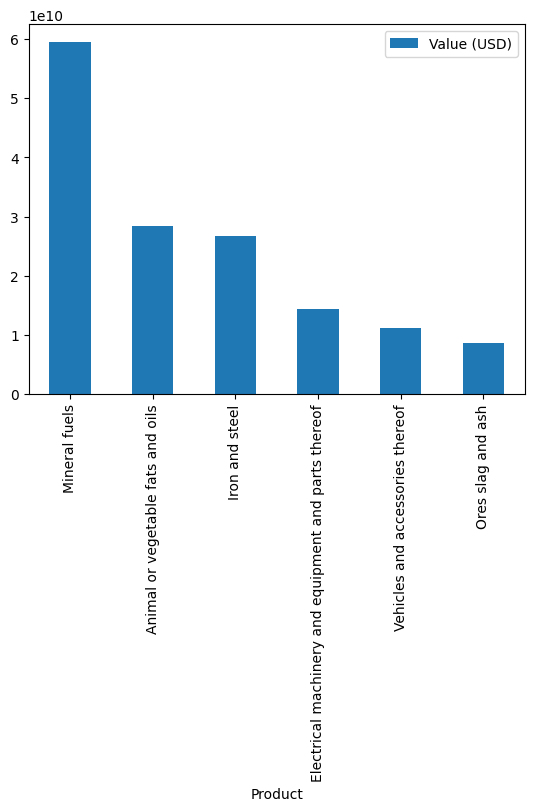

In [ ]:
df1.sort_values(by=['Value (USD)'],ascending=False).head(6).plot(kind='bar')

Berdasarkan diagram batang di atas, 6 produk yang paling banyak diekspor adalah mineral fuels diikuti dengan produk animal or vegetable fats and oils, iron and steel, electrical machinery and equipment and part thereof, vehicles and accessories, dan ores slags and ash.

Membuat dataframe baru `df2` yang berisikan variabel `Negara` dan `Value (USD)`

In [ ]:
df2 = data[['Country', 'Value (USD)']]

In [ ]:
df2 = df2.groupby('Country').sum().reset_index()

In [ ]:
df2

,Country,Value (USD)
0,AFGHANISTAN,5.104172e+06
1,ALBANIA,1.320971e+07
2,ALGERIA,2.968382e+08
3,AMERICAN SAMOA,1.937856e+06
4,ANDORRA,4.845384e+04
...,...,...
226,VIRGIN ISLANDS (BRITISH),5.700443e+06
227,WALLIS AND FUTUNA ISLANDS,2.005795e+05
228,YEMEN,1.730302e+08
229,ZAMBIA,8.109022e+06


In [ ]:
import plotly.express as px

pastel_colors = [
    "#FFB3BA",  # Light Red
    "#FFDFBA",  # Light Orange
    "#FFFFBA",  # Light Yellow
    "#BAFFC9",  # Light Green
    "#BAE1FF"   # Light Blue
]

fig = px.choropleth(
    df2,
    locations='Country',
    locationmode='country names',
    color='Value (USD)',
    hover_name='Country',
    color_continuous_scale=pastel_colors,
    title='Persebaran Jumlah Ekspor Berdasarkan Negara',
    width=1000,
    height=600
)

# Menampilkan peta
fig.show()


Peta di atas menggambarkan distribusi geografis negara-negara yang mengimpor barang dari Indonesia. Negara-negara volume impor tinggi ditandai dengan warna biru dan negara-negara dengan volume impor rendah ditandai dengan warna merah muda. Terlihat bahwa China menjadi negara dengan volume impor paling besar.

### Transformasi data

In [ ]:
df_encoded = data.pivot_table(index='ID', columns='Product', aggfunc='size', fill_value=0)

In [ ]:
df_encoded

Product,Aircraft spacecraft and parts thereof,Aluminium and articles thereof,Animal or vegetable fats and oils,Arms and ammunition and parts thereof,Articles of apparel and clothing accessories (knitted),Articles of apparel and clothing accessories (not knitted),Articles of iron or steel,Articles of leather,Articles of stone cement asbestos mica or similar materials,Beverages spirits and vinegar,Carpets and other textile floor coverings,Ceramic products,Cereals,Clocks and watches and parts thereof,Coated covered or laminated textile fabrics,Cocoa and cocoa preparations,Coffee tea and spices,Copper and articles thereof,Cork and articles of cork,Cotton,Edible fruits and nuts,Electrical machinery and equipment and parts thereof,Essential oils and resinoids perfumery and cosmetics,Explosives matches and fireworks,Felt and nonwovens special yarns and twine,Fertilisers,Fish crustaceans and mollusca,Footwear,Furniture lamps and lighting fittings,Furskins artificial fur and manufactures thereof,Glass and glassware,Glues and enzymes,Headgear and parts thereof,Incompletely knocked down motor vehicles and their components,Inorganic chemicals,Iron and steel,Knitted or crocheted fabrics,Lac gums and resins,Lead and articles thereof,Live animals,Live trees and cut flowers,Machinery and mechanical appliances and part thereof,Man-made filaments,Man-made staple fibres,Manufactures of plaiting materials,Meat and edible meat offal,Milk butter and egg,Mineral fuels,Miscellaneous articles of base metal,Miscellaneous chemical products,Miscellaneous edible preparations,Miscellaneous manufactured articles,Musical instruments parts and accessories of,Nickel and articles thereof,Oil seeds and oleaginous fruits,Optical photographic cinematographic medical instruments,Ores slag and ash,Organic chemicals,Other base metals,Other made up textile articles,Other vegetable textile fibres,Paper paperboard and articles thereof,Pharmaceutical products,Photographic or cinematographic goods,Plastics and articles thereof,Precious metals and jewellery/precious stones,Preparations of cereals and flour,Preparations of meat fish crustaceans and mollusca,Preparations of vegetables fruits and nuts,Prepared feathers and down artificial flowers and articles of human hair,Products of animals,Products of printing industry,Products of the milling industry,Pulp of wood,Railway or tramway locomotives and parts thereof,Raw hides and skins (other than furskins) and leather,Residues and waste from the food industries,Rubber and articles thereof,Salt sulphur stones and cements,Ships boats and floating structures,Silk,Soap and washing preparations,Software digital product and parcel goods,Special woven fabrics,Sugars and sugar confectionery,Tanning or dyeing extracts,Tin and articles thereof,Tobacco and cigarrete,Tools implements of base metal,Toys games and sports requisites,Umbrellas sticks and parts thereof,Vegetable plaiting materials,Vegetables,Vehicles and accessories thereof,Wood and articles of wood,Wool fine or coarse animal hair,"Works of art collectors\"" pieces and antiques",Zinc and articles thereof
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df_encoded.shape

(25755, 98)

In [ ]:
df3 = df_encoded.sum().reset_index()

In [ ]:
df3.columns = ['Product', 'Kemunculan']

In [ ]:
df3.sort_values(by='Kemunculan', ascending=False)

,Product,Kemunculan
61,Paper paperboard and articles thereof,6196
2,Animal or vegetable fats and oils,6078
94,Wood and articles of wood,5443
64,Plastics and articles thereof,4625
21,Electrical machinery and equipment and parts t...,4590
...,...,...
29,Furskins artificial fur and manufactures thereof,84
38,Lead and articles thereof,83
33,Incompletely knocked down motor vehicles and t...,83
18,Cork and articles of cork,61


## 3 - Frequent Itemset Mining


### Fpgrowth

menerapkan algoritma fp-growth ke `df_encoded` dengan batas minimum support 5%, 10%, 15%, 20%, dan 25%

### Minimum Support 5%

In [ ]:
fp_growth1 = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)
fp_growth1['itemsets'].apply(lambda x: len(x)).value_counts()

itemsets
3    952
4    685
2    413
5    168
1     53
6      6
Name: count, dtype: int64

### Minimum Support 10%

In [ ]:
fp_growth2 = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)
fp_growth2['itemsets'].apply(lambda x: len(x)).value_counts()

itemsets
1    24
2     8
Name: count, dtype: int64

### Minimum Support 15%

In [ ]:
fp_growth3 = fpgrowth(df_encoded, min_support=0.15, use_colnames=True)
fp_growth3['itemsets'].apply(lambda x: len(x)).value_counts()

itemsets
1    10
Name: count, dtype: int64

### Minimum Support 20%

In [ ]:
fp_growth4 = fpgrowth(df_encoded, min_support=0.2, use_colnames=True)
fp_growth4['itemsets'].apply(lambda x: len(x)).value_counts()

itemsets
1    3
Name: count, dtype: int64

### Minimum Support 25%

In [ ]:
fp_growth5 = fpgrowth(df_encoded, min_support=0.25, use_colnames=True)
fp_growth5['itemsets'].apply(lambda x: len(x)).value_counts()

Series([], Name: count, dtype: int64)

Dipilih minimum support sebesar 10% untuk menghindari terbentuknya association rule yang tidak relevan

In [ ]:
fp_growth = fpgrowth(df_encoded, min_support=0.1, use_colnames=True)

## 4 - Association Rule


Frequent itemset telah ditemukan dengan menerapkan algoritma  FP-Growth. Melihat jumlah aturan yang terbentuk dengan mengombinasikan min_sup sebesar 10% dan beberapa nilai min_conf


### Minimum Confidence 40%

In [ ]:
rules_fp1 = association_rules(fp_growth, metric="confidence", min_threshold=0.4)
rules_fp1.shape[0]


16

### Minimum Confidence 50%

In [ ]:
rules_fp2 = association_rules(fp_growth, metric="confidence", min_threshold=0.5)
rules_fp2.shape[0]

14

### Minimum Confidence 60 %

In [ ]:
rules_fp3 = association_rules(fp_growth, metric="confidence", min_threshold=0.6)
rules_fp3.shape[0]


10

### Minimum Confidence 70%

In [ ]:
rules_fp4 = association_rules(fp_growth, metric="confidence", min_threshold=0.7)
rules_fp4.shape[0]

4

Dipilih nilai minimum confidence sebesar 60% karena nilai ini dianggap cukup tinggi untuk memastikan bahwa aturan asosiasi yang dibentuk signifikan dan dapat dipercaya

### Strong Association Rule <br>
Membentuk 'aturan asosiasi kuat' dengan menetapkan min_sup sebesar 10% dan min_conf sebesar 60%

In [ ]:
rules = rules_fp3.sort_values(by=['confidence','lift'], ascending=False)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(Articles of apparel and clothing accessories ...,(Articles of apparel and clothing accessories ...,0.148748,0.159775,0.117958,0.793004,4.963263,0.094192,4.059146,0.938053
7,(Articles of apparel and clothing accessories ...,(Articles of apparel and clothing accessories ...,0.159775,0.148748,0.117958,0.738275,4.963263,0.094192,3.252463,0.950364
4,(Furniture lamps and lighting fittings),(Wood and articles of wood),0.157756,0.211338,0.113415,0.718927,3.401794,0.080075,2.805898,0.838281
0,(Machinery and mechanical appliances and part ...,(Electrical machinery and equipment and parts ...,0.170181,0.178218,0.119705,0.703399,3.946853,0.089376,2.770670,0.899754
1,(Electrical machinery and equipment and parts ...,(Machinery and mechanical appliances and part ...,0.178218,0.170181,0.119705,0.671678,3.946853,0.089376,2.527453,0.908554
9,(Articles of apparel and clothing accessories ...,(Plastics and articles thereof),0.159775,0.179577,0.104679,0.655164,3.648378,0.075987,2.379170,0.863942
6,(Electrical machinery and equipment and parts ...,(Plastics and articles thereof),0.178218,0.179577,0.115628,0.648802,3.612949,0.083624,2.336069,0.880060
5,(Plastics and articles thereof),(Electrical machinery and equipment and parts ...,0.179577,0.178218,0.115628,0.643892,3.612949,0.083624,2.307676,0.881518
2,(Machinery and mechanical appliances and part ...,(Plastics and articles thereof),0.170181,0.179577,0.108678,0.638604,3.556160,0.078117,2.270148,0.866210
3,(Plastics and articles thereof),(Machinery and mechanical appliances and part ...,0.179577,0.170181,0.108678,0.605189,3.556160,0.078117,2.101815,0.876130
